In [2]:
#https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data

# <font color="#2086BA">1. Importing packages and Data</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

%matplotlib inline

In [2]:
folderPath = "D:/Rep/MyLearning/competitions/kaggle/CostoRiconHVP";

In [3]:
fileName = "train.csv"
df_train = pd.read_csv(os.path.join(folderPath,fileName))

In [4]:
fileName = "test.csv"
df_test = pd.read_csv(os.path.join(folderPath,fileName))

In [5]:
data = pd.concat([df_train,df_test])

In [6]:
data.head()

,Id,SQBage,SQBdependency,SQBedjefe,SQBescolari,SQBhogar_nin,SQBhogar_total,SQBmeaned,SQBovercrowding,Target,...,television,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1
0,ID_279628684,1849,0.0,100,100,0,1,100.0,1.000000,4.0,...,0,0,0,1,0,0,1,0,NaN,190000.0
1,ID_f29eb3ddd,4489,64.0,144,144,0,1,144.0,1.000000,4.0,...,0,0,0,1,0,0,1,1,1.0,135000.0
2,ID_68de51c94,8464,64.0,0,121,0,1,121.0,0.250000,4.0,...,0,1,0,0,0,0,1,0,NaN,NaN
3,ID_d671db89c,289,1.0,121,81,4,16,121.0,1.777778,4.0,...,0,0,0,1,0,0,1,1,1.0,180000.0
4,ID_d56d6f5f5,1369,1.0,121,121,4,16,121.0,1.777778,4.0,...,0,0,0,1,0,0,1,1,1.0,180000.0


# <font color="#2086BA">2. Data Cleaning and Transformation</font> 

In [23]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
7,SQBmeaned,36
77,meaneduc,36
9,Target,23856
142,v2a1,24263
141,v18q1,25468
120,rez_esc,27581


In [17]:
print('Shape of train data :',df_train.shape)
print('Shape of train data :',df_test.shape)

Shape of train data : (9557, 143)
Shape of train data : (23856, 142)


In [20]:
print('Number of household in train data:',df_train['idhogar'].nunique())
print('Number of household in test data:',df_test['idhogar'].nunique())

Number of household in train data: 2988
Number of household in test data: 7352


In [23]:
print('Number of head of families in train data :',df_train['parentesco1'].sum())
print('Number of head of families in test data:',df_test['parentesco1'].sum())

Number of head of families in train data : 2973
Number of head of families in test data: 7334


In [25]:
familyheads = data.groupby('idhogar').agg({'parentesco1':'sum'}).reset_index()
familyheads.columns = ['idhogar','numberofheads']

In [29]:
print('The number of families with no heads:',len(familyheads[familyheads['numberofheads']==0]))

The number of families with no heads: 33


In [48]:
data['meaneduc'].fillna(0,inplace=True)
data['SQBmeaned'].fillna(0,inplace=True)
data['v18q1'].fillna(0,inplace=True)
data['rez_esc'].fillna(0,inplace=True)
data['v2a1'].fillna(0,inplace=True)

In [31]:
datatypes = data.dtypes.reset_index()
datatypes.columns = ["Count", "Column Type"]
datatypes[datatypes['Column Type']=='object']

,Count,Column Type
0,Id,object
48,idhogar,object


In [6]:
data.drop(columns = ['dependency','edjefa','edjefe','SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq'],inplace=True)

# <font color="#2086BA">3. Data Exploration</font> 

### <font color="#2893D5">1. Effect of luxury items</font> 

In [6]:
#Refrigerator - refrig
temp1 = df_train['refrig'].value_counts().reset_index()
temp2 = df_train.pivot_table(values="refrig",index="Target",aggfunc=lambda x:x.mean()).reset_index()
temp3 = pd.crosstab(df_train['refrig'], df_train['Target'])
print('Frequency table for refrig')
print(temp1)

print('Probability of having Refrigerator for each Target class')
print(temp2)

Frequency table for refrig
   index  refrig
0      1    9152
1      0     405
Probability of having Refrigerator for each Target class
   Target    refrig
0       1  0.887417
1       2  0.928616
2       3  0.961952
3       4  0.973316


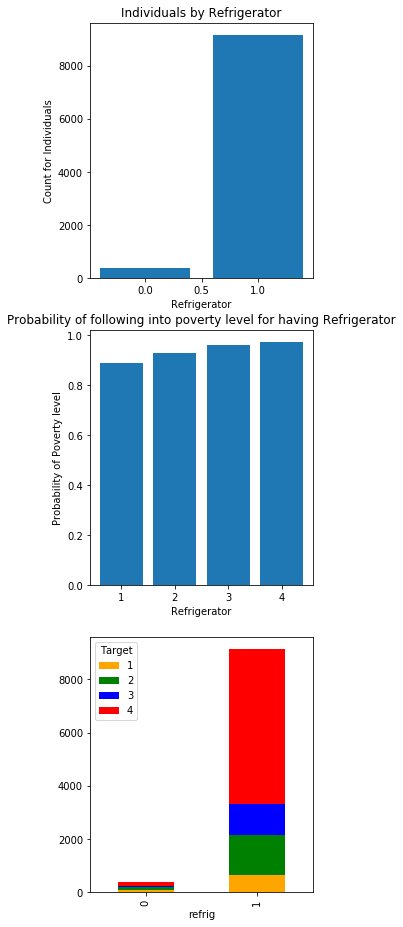

In [7]:
fig = plt.figure(figsize=(4,16))
ax1 = fig.add_subplot(311)
ax1.set_xlabel('Refrigerator')
ax1.set_ylabel('Count for Individuals')
ax1.set_title("Individuals by Refrigerator")
ax1.bar(temp1['index'],temp1['refrig']) #.plot(kind='bar')

ax2 = fig.add_subplot(312)
ax2.set_xlabel('Refrigerator')
ax2.set_ylabel('Probability of Poverty level')
ax2.set_title("Probability of following into poverty level for having Refrigerator")
ax2.bar(temp2['Target'],temp2['refrig']) #.plot(kind = 'bar')

ax3 = fig.add_subplot(313)
temp3.plot(kind='bar', stacked=True, color=['orange','green','blue','red'], grid=False,ax=ax3)
plt.show()
del(temp1)
del(temp2)
del(temp3)

In [8]:
temp1 = df_train.groupby('idhogar').agg({'refrig':'sum','Id':'count'}).reset_index()
print('If Refrigerator count is fine within family:',len(temp1[(temp1['refrig']!=temp1['Id']) & (temp1['refrig']>0)])==0)
del(temp1)
print('Refrigerator looks to have very little effect on povery levels')

If Refrigerator count is fine within family: True
Refrigerator looks to have very little effect on povery levels


In [9]:
table1 = df_train.pivot_table(index=["refrig"],columns='Target',values='Id', aggfunc=len, margins=True, dropna=True,fill_value=0)
print(table1.div(table1.iloc[:,-1], axis=0))
del(table1)
print('For all people having refrigerators only 7 % fall into extreme poverty while 63% are in good condition')
print('while of all people not having refrigerators onl 20% fall into extreme poverty while 40% are in good condition')

Target         1         2         3         4  All
refrig                                             
0       0.209877  0.281481  0.113580  0.395062  1.0
1       0.073208  0.162041  0.127076  0.637675  1.0
All     0.079000  0.167103  0.126504  0.627394  1.0
For all people having refrigerators only 7 % fall into extreme poverty while 63% are in good condition
while of all people not having refrigerators onl 20% fall into extreme poverty while 40% are in good condition


In [33]:
#Working on tablets v18q (if user owns a tablet) and v18q1 (number of tablets in household)
print('Number of tables in household looks to have lot of null values :',data['v18q1'].isnull().sum())

25468

In [55]:
tabletsperhousehold = data.groupby('idhogar').agg({'v18q':'sum'}).reset_index()
tabletsperhousehold.columns=['idhogar','tabletsperhousehold']
data = pd.merge(data,tabletsperhousehold,how='left',on='idhogar')
print('Length of individuals with no tables in household :',len(data[(data['tabletsperhousehold']==0) & data['v18q1'].isnull()]['idhogar']))
print('Null values in v18q1 column:',data['v18q1'].isnull().sum())
data.drop(columns=['tabletsperhousehold'],inplace=True)

In [70]:
temp1 = df_train['v18q'].value_counts().reset_index()
temp2 = df_train.pivot_table(values="v18q",index="Target",aggfunc=lambda x:x.mean()).reset_index()
temp3 = pd.crosstab(df_train['v18q'], df_train['Target'])
print('Frequency table for v18q')
print(temp1)

print('Probability of having Tablet for each Target class')
print(temp2)

Frequency table for v18q
   index  v18q
0      0  7342
1      1  2215
Probability of having Tablet for each Target class
   Target      v18q
0       1  0.079470
1       2  0.078272
2       3  0.118280
3       4  0.314710


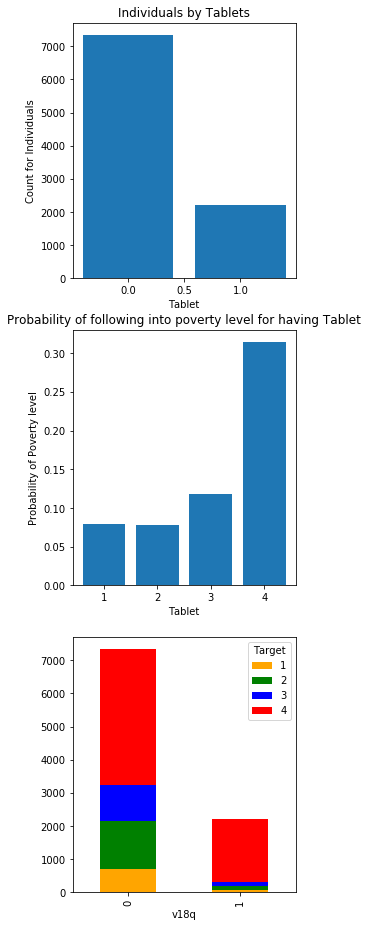

In [71]:
fig = plt.figure(figsize=(4,16))
ax1 = fig.add_subplot(311)
ax1.set_xlabel('Tablet')
ax1.set_ylabel('Count for Individuals')
ax1.set_title("Individuals by Tablets")
ax1.bar(temp1['index'],temp1['v18q'])

ax2 = fig.add_subplot(312)
ax2.set_xlabel('Tablet')
ax2.set_ylabel('Probability of Poverty level')
ax2.set_title("Probability of following into poverty level for having Tablet")
ax2.bar(temp2['Target'],temp2['v18q'])

ax3 = fig.add_subplot(313)
temp3.plot(kind='bar', stacked=True, color=['orange','green','blue','red'], grid=False,ax=ax3)
plt.show()
del(temp1)
del(temp2)
del(temp3)

In [73]:
table1 = df_train.pivot_table(index=["v18q"],columns='Target',values='Id', aggfunc=len, margins=True, dropna=True,fill_value=0)
print(table1.div(table1.iloc[:,-1], axis=0))
del(table1)
print('For all people having tablets only 3 % fall into extreme poverty while 63% are in good condition')
print('while of all people not having tablets onl 9% fall into extreme poverty while 56% are in good condition')
print("From Above stats it looks like having tablet doesn't play any significant role in poverty determination")

Target         1         2         3         4  All
v18q                                               
0       0.094661  0.200490  0.145192  0.559657  1.0
1       0.027088  0.056433  0.064560  0.851919  1.0
All     0.079000  0.167103  0.126504  0.627394  1.0
For all people having tablets only 3 % fall into extreme poverty while 63% are in good condition
while of all people not having tablets onl 9% fall into extreme poverty while 56% are in good condition
From Above stats it looks like having tablet doesn't play any significant role in poverty determination


In [74]:
table1 = df_train.pivot_table(index=["v18q1"],columns='Target',values='Id', aggfunc=len, margins=True, dropna=True,fill_value=0)
print(table1.div(table1.iloc[:,-1], axis=0))
del(table1)
print("For all people having less than 4 tablets in household doesn't look to impact poverty condition")
print("For all people having more than 4 tablets in household are in good condition")

Target         1         2         3         4  All
v18q1                                              
1.0     0.021438  0.060530  0.072509  0.845523  1.0
2.0     0.031532  0.054054  0.042793  0.871622  1.0
3.0     0.046512  0.038760  0.046512  0.868217  1.0
4.0     0.162162  0.000000  0.081081  0.756757  1.0
5.0     0.000000  0.000000  0.000000  1.000000  1.0
6.0     0.000000  0.000000  0.000000  1.000000  1.0
All     0.027088  0.056433  0.064560  0.851919  1.0
For all people having tablets only 3 % fall into extreme poverty while 63% are in good condition
while of all people not having tablets onl 9% fall into extreme poverty while 56% are in good condition
From Above stats it looks like having tablet doesn't play any significant role in poverty determination


In [76]:
len(df_train[df_train['v18q1']>4])

19

In [88]:
table1 = df_train.pivot_table(index=["computer"],columns='Target',values='Id', aggfunc=len, margins=True, dropna=True,fill_value=0)
print(table1.div(table1.iloc[:,-1], axis=0))
del(table1)
print("For all people having computer looks to impact poverty condition")

Target          1         2         3         4  All
computer                                            
0         0.08647  0.183195  0.134250  0.596084  1.0
1         0.01332  0.025615  0.058402  0.902664  1.0
All       0.07900  0.167103  0.126504  0.627394  1.0
For all people having less than 4 tablets in household doesn't look to impact poverty condition
For all people having more than 4 tablets in household are in good condition


In [91]:
table1 = df_train.pivot_table(index=["mobilephone"],columns='Target',values='Id', aggfunc=len, margins=True, dropna=True,fill_value=0)
print(table1.div(table1.iloc[:,-1], axis=0))
del(table1)
print("For all people having mobile looks to impact poverty condition")

Target              1         2         3         4  All
mobilephone                                             
0            0.182203  0.300847  0.224576  0.292373  1.0
1            0.076387  0.163716  0.124021  0.635876  1.0
All          0.079000  0.167103  0.126504  0.627394  1.0
For all people having mobile looks to impact poverty condition


In [93]:
table1 = df_train.pivot_table(index=["qmobilephone"],columns='Target',values='Id', aggfunc=len, margins=True, dropna=True,fill_value=0)
print(table1.div(table1.iloc[:,-1], axis=0))
del(table1)
print("For all people having total number of mobole phones in family looks to impact on poverty condition")

Target               1         2         3         4  All
qmobilephone                                             
0             0.182203  0.300847  0.224576  0.292373  1.0
1             0.154096  0.266829  0.133009  0.446067  1.0
2             0.097661  0.170354  0.120101  0.611884  1.0
3             0.052726  0.146913  0.129788  0.670572  1.0
4             0.046795  0.127564  0.110256  0.715385  1.0
5             0.008969  0.112108  0.134529  0.744395  1.0
6             0.052469  0.111111  0.141975  0.694444  1.0
7             0.000000  0.280000  0.000000  0.720000  1.0
8             0.000000  0.119403  0.104478  0.776119  1.0
9             0.000000  0.000000  0.500000  0.500000  1.0
10            0.000000  0.000000  0.000000  1.000000  1.0
All           0.079000  0.167103  0.126504  0.627394  1.0
For all people having mobile looks to impact poverty condition


In [131]:
qfilter = (df_train['refrig']==1) & (df_train['v18q']==1) & (df_train['mobilephone']==1) & (df_train['computer']==1)
print(df_train[qfilter]['Target'].value_counts(normalize=True))
print(df_train[qfilter]['Target'].value_counts()

,Id,Target,abastaguadentro,abastaguafuera,abastaguano,age,area1,area2,bedrooms,cielorazo,...,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1,tabletsperhousehold,morethan4tablets
0,ID_279628684,4.0,1,0,0,43,1,0,1,1,...,0,1,0,0,1,0,0.0,190000.0,0,0
1,ID_f29eb3ddd,4.0,1,0,0,67,1,0,1,1,...,0,1,0,0,1,1,1.0,135000.0,1,0
2,ID_68de51c94,4.0,1,0,0,92,1,0,2,1,...,0,0,0,0,1,0,0.0,NaN,0,0
3,ID_d671db89c,4.0,1,0,0,17,1,0,3,1,...,0,1,0,0,1,1,1.0,180000.0,4,0
4,ID_d56d6f5f5,4.0,1,0,0,37,1,0,3,1,...,0,1,0,0,1,1,1.0,180000.0,4,0
5,ID_ec05b1a7b,4.0,1,0,0,38,1,0,3,1,...,0,1,0,0,1,1,1.0,180000.0,4,0
6,ID_e9e0c1100,4.0,1,0,0,8,1,0,3,1,...,0,1,0,0,1,1,1.0,180000.0,4,0
7,ID_3e04e571e,4.0,1,0,0,7,1,0,1,1,...,0,1,0,0,1,0,0.0,130000.0,0,0
8,ID_1284f8aad,4.0,1,0,0,30,1,0,1,1,...,0,1,0,0,1,0,0.0,130000.0,0,0
9,ID_51f52fdd2,4.0,1,0,0,28,1,0,1,1,...,0,1,0,0,1,0,0.0,130000.0,0,0


In [112]:
df_train['Target'].value_counts(normalize=True)

4    0.627394
2    0.167103
3    0.126504
1    0.079000
Name: Target, dtype: float64

### <font color="#2893D5">2. Effect of House hold</font> 

##### <font color='#135589'>Wall Material</font>

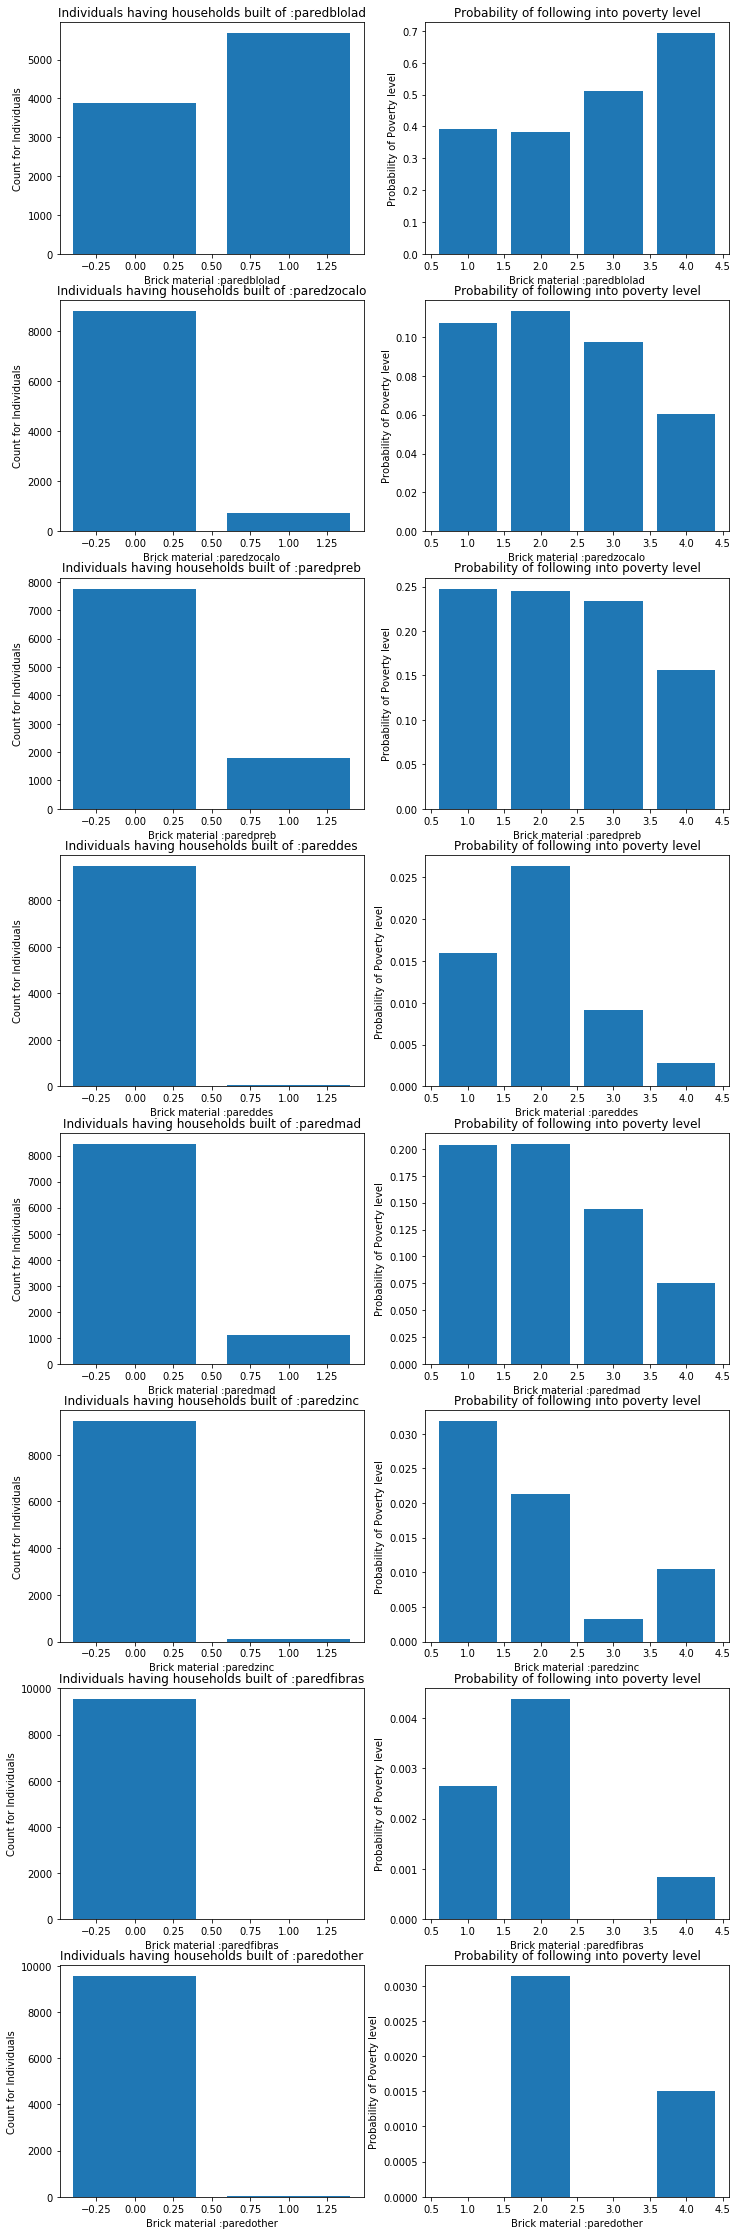

In [10]:
wallmaterial = ['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']
fig = plt.figure(figsize=(12,40))
ax = []
fignumber = 0
subpplotnumber = 821
for col in wallmaterial:
    temp1 = df_train[col].value_counts().reset_index()
    temp2 = df_train.pivot_table(values=col,index="Target",aggfunc=lambda x:x.mean()).reset_index()
    ax.append(fig.add_subplot(8,2,fignumber+1))
    ax[fignumber].set_xlabel('Brick material :' + str(col))
    ax[fignumber].set_ylabel('Count for Individuals')
    ax[fignumber].set_title("Individuals having households built of :" + str(col))
    ax[fignumber].bar(temp1['index'],temp1[col])
    
    ax.append(fig.add_subplot(8,2,fignumber+2))
    ax[fignumber+1].set_xlabel('Brick material :' + str(col))
    ax[fignumber+1].set_ylabel('Probability of Poverty level')
    ax[fignumber+1].set_title("Probability of following into poverty level")
    ax[fignumber+1].bar(temp2['Target'],temp2[col])
    
    fignumber = fignumber+2;
    subpplotnumber = subpplotnumber + 2;

In [24]:
temp1 = data['paredblolad'].sum() + data['paredzocalo'].sum() + data['paredpreb'].sum() + data['pareddes'].sum() + data['paredmad'].sum() + data['paredzinc'].sum() + data['paredfibras'].sum() + data['paredother'].sum()
print("If the walls data is correct :",len(data) == temp1)
del(temp1)

If the walls data is correct : True


In [25]:
def getWallsMaterial(row):
    wallmaterial = ['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother'];
    for material in wallmaterial:
        if row[material] == 1:
            return material;
        
    return '';

data['wallmaterial'] = data.apply(getWallsMaterial,axis=1)
data['wallmaterial'].value_counts()

Target          1    2    3     4
wallmaterial                     
paredblolad   295  609  620  4153
pareddes       12   42   11    17
paredfibras     2    7    0     5
paredmad      154  327  174   450
paredother      0    5    0     9
paredpreb     187  392  282   936
paredzinc      24   34    4    63
paredzocalo    81  181  118   363


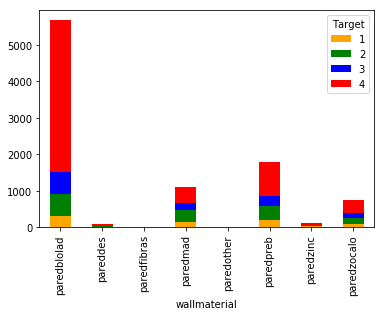

In [28]:
df_train['wallmaterial'] = df_train.apply(getWallsMaterial,axis=1)
temp3 = pd.crosstab(df_train['wallmaterial'], df_train['Target'])
print(temp3)
temp3.plot(kind='bar', stacked=True, color=['orange','green','blue','red'], grid=False)
del(temp3)

In [111]:
df_train.groupby('Target').agg({'paredblolad':'mean',
                                        'paredzocalo':'mean',
                                        'paredpreb':'mean',
                                        'pareddes':'mean',
                                        'paredmad':'mean',
                                        'paredzinc':'mean',
                                        'paredfibras':'mean',
                                        'paredother':'mean'}).reset_index()

,Target,paredpreb,paredmad,pareddes,paredblolad,paredfibras,paredzocalo,paredzinc,paredother
0,1,0.247682,0.203974,0.015894,0.390728,0.002649,0.107285,0.031788,0.000000
1,2,0.245460,0.204759,0.026299,0.381340,0.004383,0.113338,0.021290,0.003131
2,3,0.233251,0.143921,0.009098,0.512821,0.000000,0.097601,0.003309,0.000000
3,4,0.156104,0.075050,0.002835,0.692628,0.000834,0.060540,0.010507,0.001501


In [72]:
temp1 = df_train.groupby('Target').agg({'paredblolad':'sum',
                                        'paredzocalo':'sum',
                                        'paredpreb':'sum',
                                        'pareddes':'sum',
                                        'paredmad':'sum',
                                        'paredzinc':'sum',
                                        'paredfibras':'sum',
                                        'paredother':'sum'}).reset_index()
wallmaterial = ['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother'];
for col in wallmaterial:
    temp1[col] = temp1[col]/float(len(df_train))
    
print(temp1)
del(temp1)

   Target  paredpreb  paredmad  pareddes  paredblolad  paredfibras  \
0       1   0.019567  0.016114  0.001256     0.030867     0.000209   
1       2   0.041017  0.034216  0.004395     0.063723     0.000732   
2       3   0.029507  0.018207  0.001151     0.064874     0.000000   
3       4   0.097939  0.047086  0.001779     0.434551     0.000523   

   paredzocalo  paredzinc  paredother  
0     0.008475   0.002511    0.000000  
1     0.018939   0.003558    0.000523  
2     0.012347   0.000419    0.000000  
3     0.037983   0.006592    0.000942  


##### <font color='#135589'>Floor Material</font>

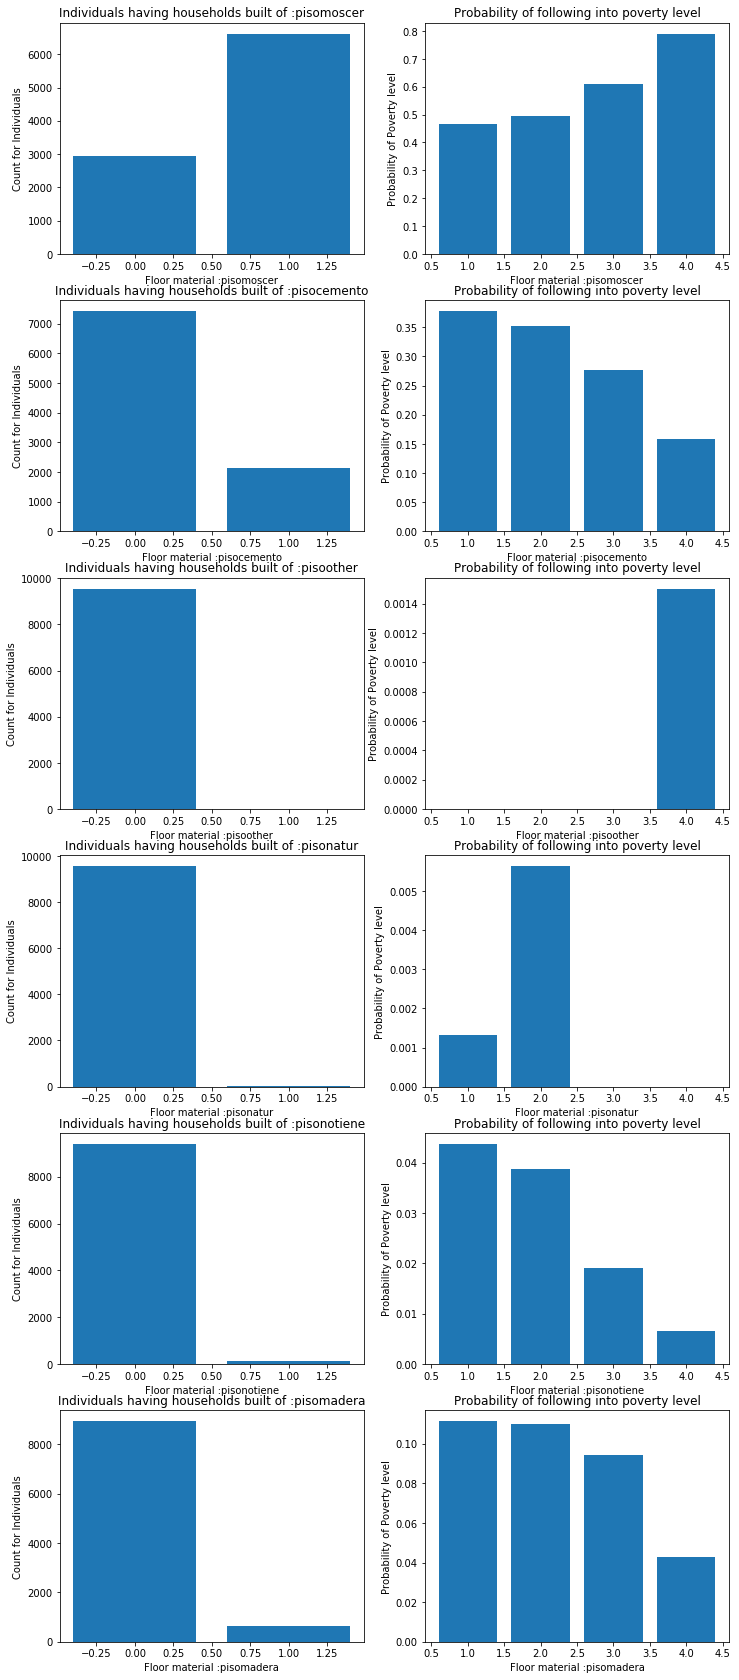

In [31]:
floormaterial = ['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']
fig = plt.figure(figsize=(12,40))
ax = []
fignumber = 0
for col in floormaterial:
    temp1 = df_train[col].value_counts().reset_index()
    temp2 = df_train.pivot_table(values=col,index="Target",aggfunc=lambda x:x.mean()).reset_index()
    ax.append(fig.add_subplot(8,2,fignumber+1))
    ax[fignumber].set_xlabel('Floor material :' + str(col))
    ax[fignumber].set_ylabel('Count for Individuals')
    ax[fignumber].set_title("Individuals having households built of :" + str(col))
    ax[fignumber].bar(temp1['index'],temp1[col])
    
    ax.append(fig.add_subplot(8,2,fignumber+2))
    ax[fignumber+1].set_xlabel('Floor material :' + str(col))
    ax[fignumber+1].set_ylabel('Probability of Poverty level')
    ax[fignumber+1].set_title("Probability of following into poverty level")
    ax[fignumber+1].bar(temp2['Target'],temp2[col])
    
    fignumber = fignumber+2;

In [32]:
floormaterial = ['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']
temp1 = 0;
for col in floormaterial:
    temp1 = temp1 + data[col].sum()
print("If the floor data is correct :",len(data) == temp1)
del(temp1)

If the floor data is correct : True


In [34]:
def getFloorMaterial(row):
    floormaterial = ['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']
    for material in floormaterial:
        if row[material] == 1:
            return material;
        
    return '';

data['floormaterial'] = data.apply(getFloorMaterial,axis=1)
data['floormaterial'].value_counts()

pisomoscer     23147
pisocemento     7713
pisomadera      2011
pisonotiene      478
pisoother         51
pisonatur         13
Name: floormaterial, dtype: int64

Target           1    2    3     4
floormaterial                     
pisocemento    285  561  334   950
pisomadera      84  176  114   256
pisomoscer     352  789  738  4742
pisonatur        1    9    0     0
pisonotiene     33   62   23    39
pisoother        0    0    0     9


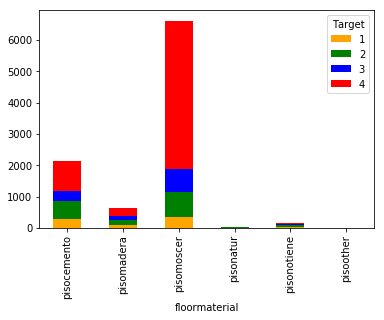

In [35]:
df_train['floormaterial'] = df_train.apply(getFloorMaterial,axis=1)
temp3 = pd.crosstab(df_train['floormaterial'], df_train['Target'])
print(temp3)
temp3.plot(kind='bar', stacked=True, color=['orange','green','blue','red'], grid=False)
del(temp3)

In [42]:
df_train.groupby('Target').agg({'pisomoscer':'mean',
                                 'pisocemento':'mean',
                                 'pisoother':'mean',
                                 'pisonatur':'mean',
                                 'pisonotiene':'mean',
                                 'pisomadera':'mean'}).reset_index()

,Target,pisoother,pisonotiene,pisomadera,pisomoscer,pisonatur,pisocemento
0,1,0.000000,0.043709,0.111258,0.466225,0.001325,0.377483
1,2,0.000000,0.038823,0.110207,0.494051,0.005636,0.351284
2,3,0.000000,0.019024,0.094293,0.610422,0.000000,0.276261
3,4,0.001501,0.006504,0.042695,0.790861,0.000000,0.158439


In [70]:
temp1 = df_train.groupby('Target').agg({'pisomoscer':'sum',
                                 'pisocemento':'sum',
                                 'pisoother':'sum',
                                 'pisonatur':'sum',
                                 'pisonotiene':'sum',
                                 'pisomadera':'sum'}).reset_index()
floormaterial = ['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']
for col in floormaterial:
    temp1[col] = temp1[col]/float(len(df_train))
    
print(temp1)
del(temp1)

   Target  pisoother  pisonotiene  pisomadera  pisomoscer  pisonatur  \
0       1   0.000000     0.003453    0.008789    0.036832   0.000105   
1       2   0.000000     0.006487    0.018416    0.082557   0.000942   
2       3   0.000000     0.002407    0.011928    0.077221   0.000000   
3       4   0.000942     0.004081    0.026787    0.496181   0.000000   

   pisocemento  
0     0.029821  
1     0.058700  
2     0.034948  
3     0.099404  


##### <font color='#135589'>Roof Material</font>

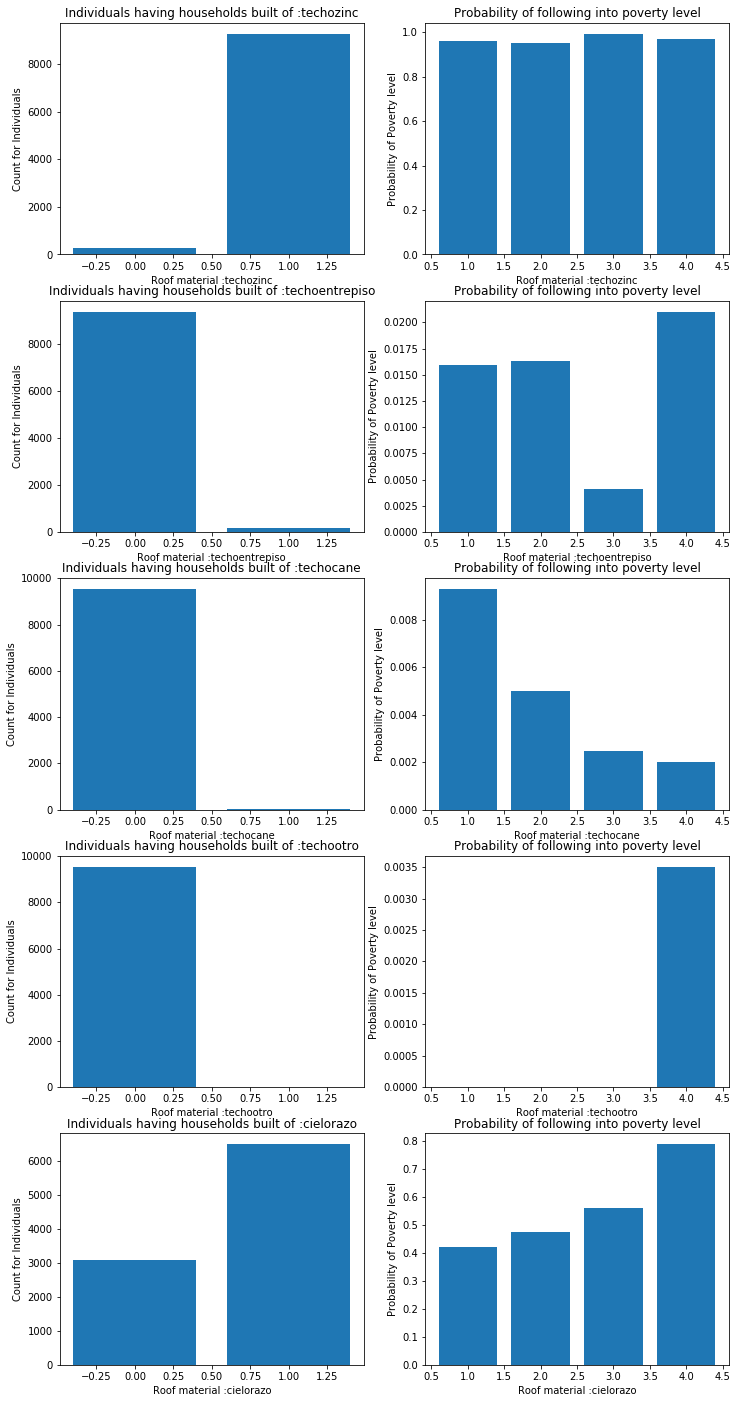

In [89]:
roofmaterial = ['techozinc','techoentrepiso','techocane','techootro','cielorazo']
fig = plt.figure(figsize=(12,40))
ax = []
fignumber = 0
for col in roofmaterial:
    temp1 = df_train[col].value_counts().reset_index()
    temp2 = df_train.pivot_table(values=col,index="Target",aggfunc=lambda x:x.mean()).reset_index()
    ax.append(fig.add_subplot(8,2,fignumber+1))
    ax[fignumber].set_xlabel('Roof material :' + str(col))
    ax[fignumber].set_ylabel('Count for Individuals')
    ax[fignumber].set_title("Individuals having households built of :" + str(col))
    ax[fignumber].bar(temp1['index'],temp1[col])
    
    ax.append(fig.add_subplot(8,2,fignumber+2))
    ax[fignumber+1].set_xlabel('Roof material :' + str(col))
    ax[fignumber+1].set_ylabel('Probability of Poverty level')
    ax[fignumber+1].set_title("Probability of following into poverty level")
    ax[fignumber+1].bar(temp2['Target'],temp2[col])
    
    fignumber = fignumber+2;

In [84]:
roofmaterial = ['techozinc','techoentrepiso','techocane','techootro','cielorazo']
temp1 = 0;
for col in roofmaterial:
    temp1 = temp1 + data[col].sum()
print("If the roof data is correct :",len(data) == temp1)
print("Since there are houses with no roofs")
del(temp1)

If the roof data is correct : False
Since there are houses with no roofs


In [97]:
def getRoofMaterial(row):
    roofmaterial = ['techozinc','techoentrepiso','techocane','techootro','cielorazo']
    for material in roofmaterial:
        if row[material] == 1:
            return material;
        
    return '';

data['roofmaterial'] = data.apply(getRoofMaterial,axis=1)
print(data['roofmaterial'].value_counts())
print('There are 205 rows with no ceiling information')

techozinc         32448
techoentrepiso      622
                    205
techocane            81
techootro            55
cielorazo             2
Name: roofmaterial, dtype: int64
There are 205 rows with no ceiling information


Target            1     2     3     4
roofmaterial                         
                 10    40     2    14
techocane         7     8     3    12
techoentrepiso   12    26     5   126
techootro         0     0     0    21
techozinc       726  1523  1199  5823


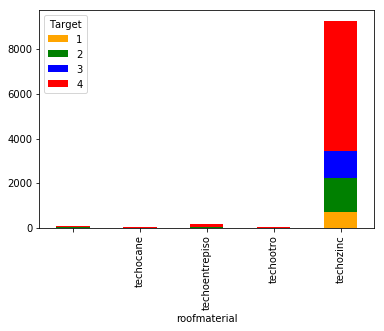

In [98]:
df_train['roofmaterial'] = df_train.apply(getRoofMaterial,axis=1)
temp3 = pd.crosstab(df_train['roofmaterial'], df_train['Target'])
print(temp3)
temp3.plot(kind='bar', stacked=True, color=['orange','green','blue','red'], grid=False)
del(temp3)

In [110]:
df_train.groupby('Target').agg({'techozinc':'mean',
                                        'techoentrepiso':'mean',
                                        'techocane':'mean',
                                        'techootro':'mean'}).reset_index()

,Target,techozinc,techootro,techoentrepiso,techocane
0,1,0.961589,0.000000,0.015894,0.009272
1,2,0.953663,0.000000,0.016281,0.005009
2,3,0.991729,0.000000,0.004136,0.002481
3,4,0.971147,0.003502,0.021014,0.002001


In [103]:
temp1 = df_train.groupby('Target').agg({'techozinc':'sum',
                                        'techoentrepiso':'sum',
                                        'techocane':'sum',
                                        'techootro':'sum'}).reset_index()
roofmaterial = ['techozinc','techoentrepiso','techocane','techootro']

for col in roofmaterial:
    temp1[col] = temp1[col]/float(len(df_train))
    
print(temp1)
del(temp1)

   Target  techozinc  techootro  techoentrepiso  techocane
0       1   0.075965   0.000000        0.001256   0.000732
1       2   0.159360   0.000000        0.002721   0.000837
2       3   0.125458   0.000000        0.000523   0.000314
3       4   0.609292   0.002197        0.013184   0.001256


### <font color="#2893D5">2. Effect of House hold Utilities</font> 

####  <font color='#135589'>Water</font>

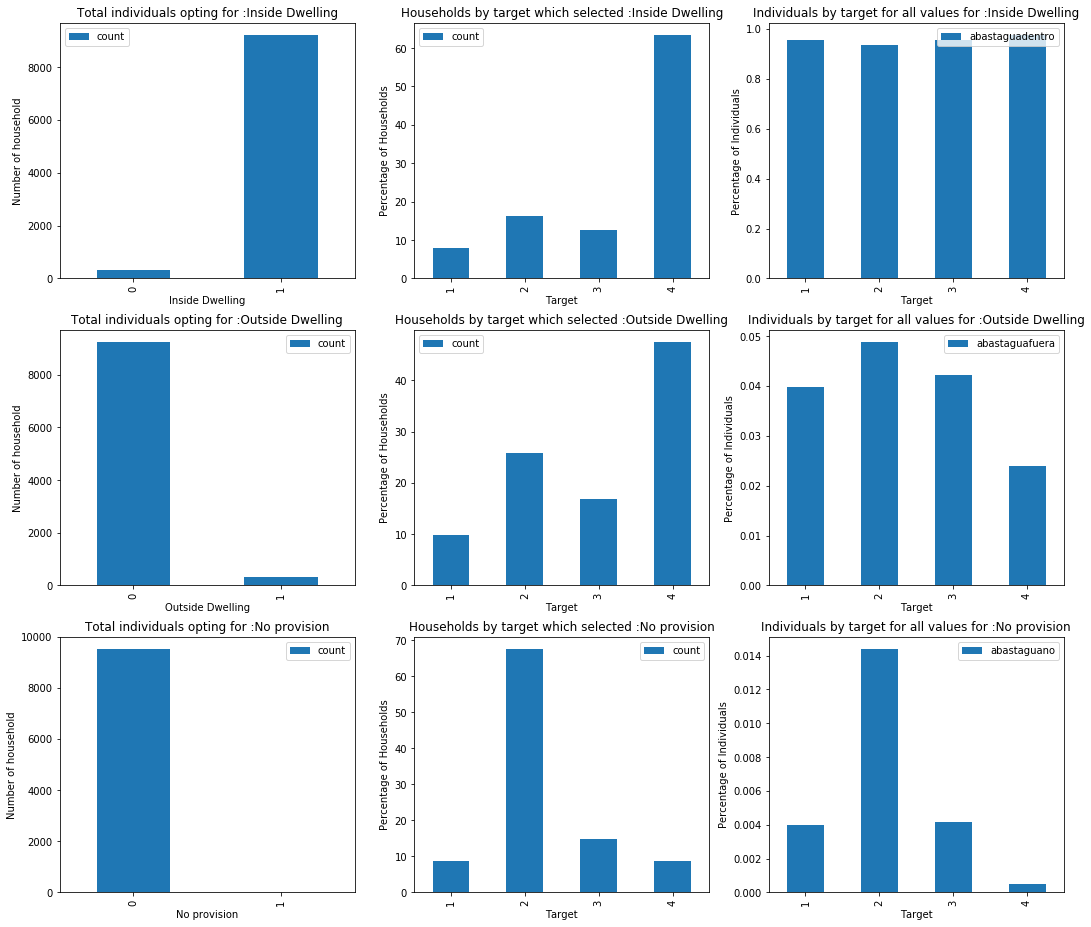

In [34]:
fig = plt.figure(figsize=(18,16))
watersources = ['abastaguadentro','abastaguafuera','abastaguano']
watersourcesmeaning = {'abastaguadentro':'Inside Dwelling','abastaguafuera':'Outside Dwelling','abastaguano':'No provision'}
i = 1
for col in watersources:
    temp1 = df_train.groupby(col).agg({'Id':'count'}).reset_index()
    temp1.drop(columns=[col],inplace=True)
    temp1.columns = ['count']
    ax1 = fig.add_subplot(len(watersources),3,i)
    ax1.set_xlabel(watersourcesmeaning[col])
    ax1.set_ylabel('Number of household')
    ax1.set_title('Total individuals opting for :' + str(watersourcesmeaning[col]))
    temp1.plot(kind='bar',ax=ax1)
    
    temp2 = df_train.groupby('Target').agg({col:'sum'}).reset_index()
    temp2[col] = (temp2[col]/temp2[col].sum())*100
    temp2.set_index('Target',inplace=True)
    temp2.columns = ['count']
    ax2 = fig.add_subplot(len(watersources),3,i+1)
    ax2.set_xlabel('Poverty Condition')
    ax2.set_ylabel('Percentage of Households')
    ax2.set_title('Households by target which selected :' + str(watersourcesmeaning[col]))
    temp2.plot(kind='bar',ax=ax2)
    
    temp3 = df_train.groupby('Target').agg({col:'mean'}).reset_index()
    temp3.set_index('Target',inplace=True)
    ax3 = fig.add_subplot(len(watersources),3,i+2)
    ax3.set_xlabel('Poverty Condition')
    ax3.set_ylabel('Percentage of Individuals')
    ax3.set_title('Individuals by target for all values for :' + str(watersourcesmeaning[col]))
    temp3.plot(kind='bar',ax=ax3)
    del(temp1)
    del(temp2)
    del(temp3)
    i = i+3

#temp2 = pd.crosstab(df_train['abastaguadentro'],df_train['Target'])
#temp2 = temp2.reset_index().drop(columns=['abastaguadentro']);
#temp2['rowtotal'] = temp2.apply(lambda x : x.sum(),axis=1)
#temp2.columns = ['Target1','Target2','Target3','Target4','rowtotal']
#for col in ['Target1','Target2','Target3','Target4']:
#    temp2[col] = (temp2[col]/temp2['rowtotal'])*100
#temp2.drop(columns=['rowtotal'],inplace=True)
#temp2.plot(kind='bar',stacked=True,ax=ax2)

1. Most of the household have water source inside dwelling
2. Allmost all households in all target groups have water provisioned inside dwelling
3. For target 2 the water source provisioned outside dwelling or not provisioned unusual than others
4. Target 4 has almost no entries with no water provision

#### <font color='#135589'>Electricity</font>

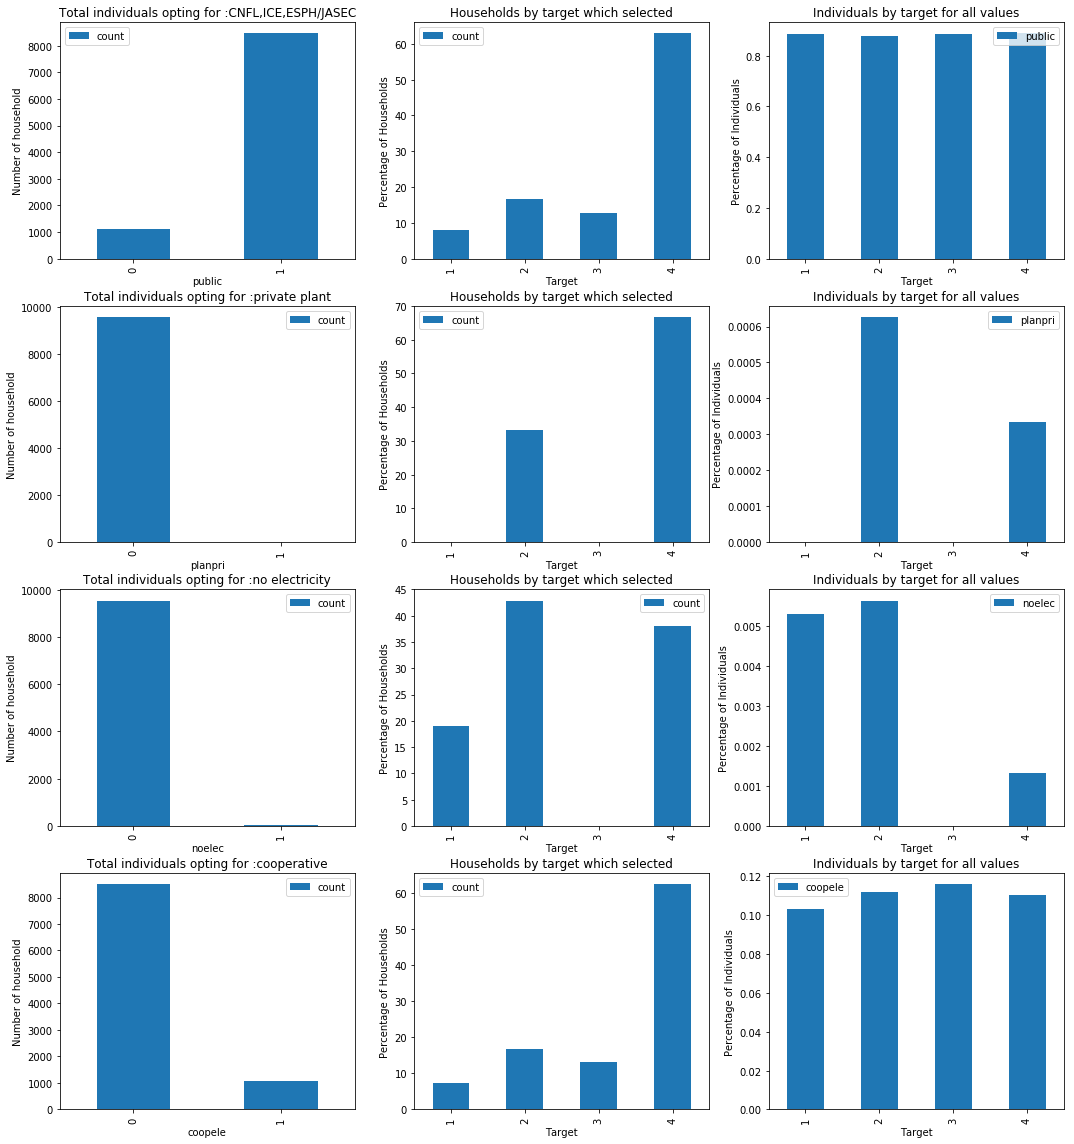

In [36]:
fig = plt.figure(figsize=(18,20))
electricitySources = ['public','planpri','noelec','coopele']
electricitySourcesmeaning = {'public':'CNFL,ICE,ESPH/JASEC','planpri':'private plant','noelec':'no electricity','coopele':'cooperative'}
i = 1
for col in electricitySources:
    temp1 = df_train.groupby(col).agg({'Id':'count'}).reset_index()
    temp1.drop(columns=[col],inplace=True)
    temp1.columns = ['count']
    ax1 = fig.add_subplot(len(electricitySources),3,i)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Number of household')
    ax1.set_title('Total individuals opting for :' + str(electricitySourcesmeaning[col]))
    temp1.plot(kind='bar',ax=ax1)
    
    temp2 = df_train.groupby('Target').agg({col:'sum'}).reset_index()
    temp2[col] = (temp2[col]/temp2[col].sum())*100
    temp2.set_index('Target',inplace=True)
    temp2.columns = ['count']
    ax2 = fig.add_subplot(len(electricitySources),3,i+1)
    ax2.set_xlabel('Poverty Condition')
    ax2.set_ylabel('Percentage of Households')
    ax2.set_title('Households by target which selected')
    temp2.plot(kind='bar',ax=ax2)
    
    temp3 = df_train.groupby('Target').agg({col:'mean'}).reset_index()
    temp3.set_index('Target',inplace=True)
    ax3 = fig.add_subplot(len(electricitySources),3,i+2)
    ax3.set_xlabel('Poverty Condition')
    ax3.set_ylabel('Percentage of Individuals')
    ax3.set_title('Individuals by target for all values')
    temp3.plot(kind='bar',ax=ax3)
    del(temp1)
    del(temp2)
    del(temp3)
    i = i+3

#### <font color='#135589'>Toilet in dwelling</font>

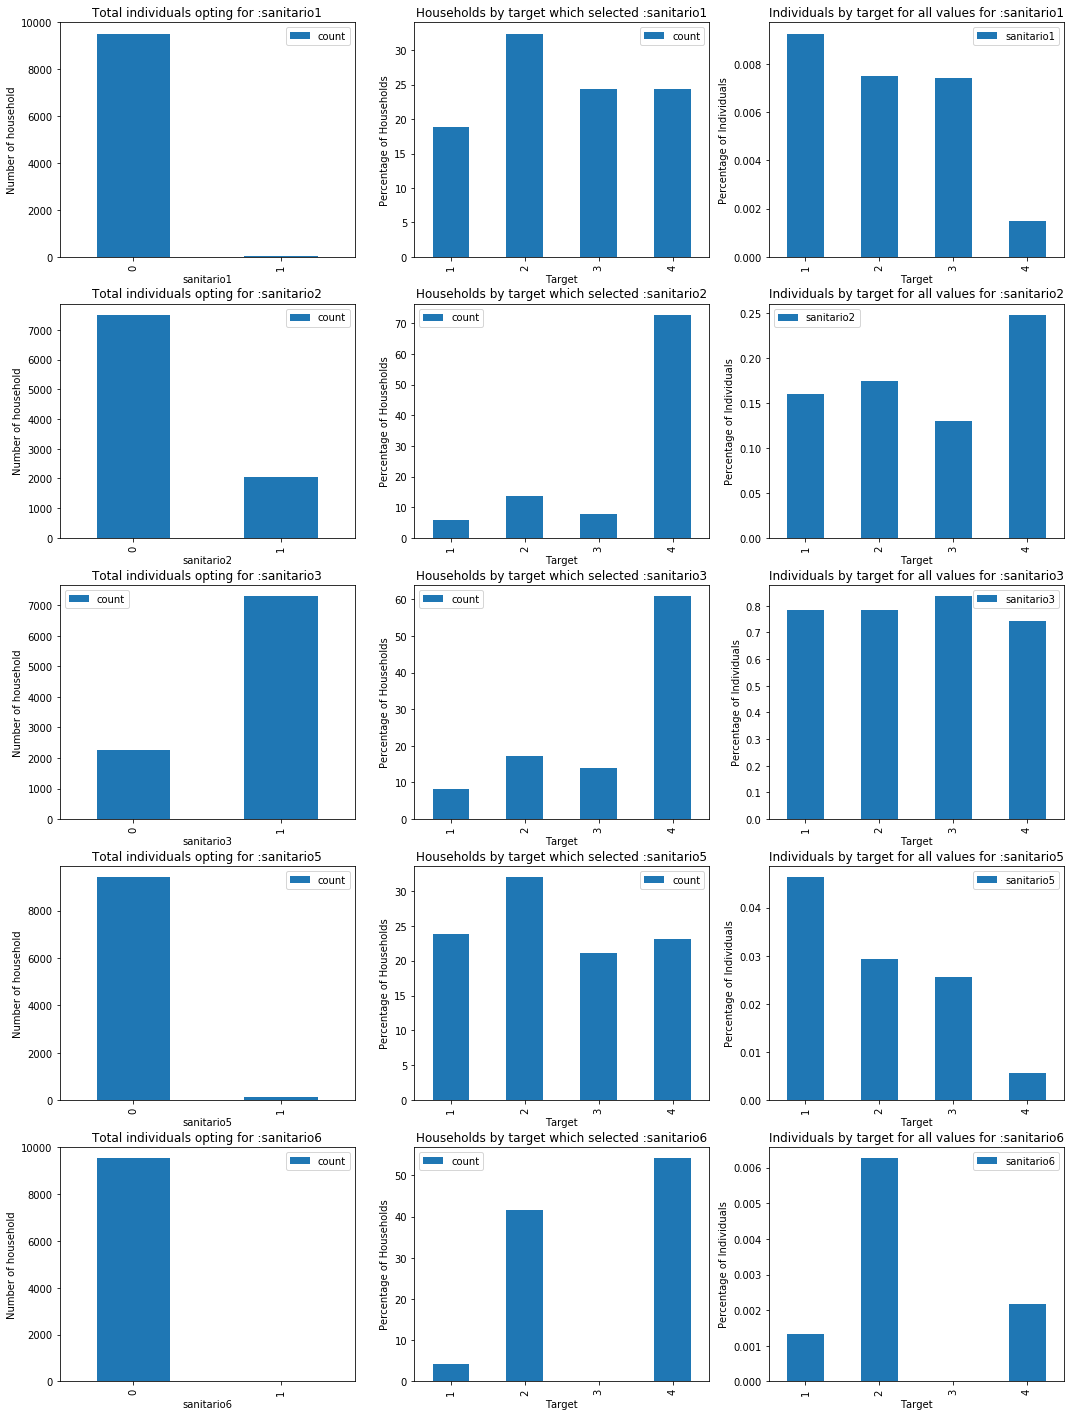

In [29]:
toiletplaces = ['sanitario1','sanitario2','sanitario3','sanitario5','sanitario6']
fig = plt.figure(figsize=(18,len(toiletplaces)*5))
i = 1
for col in toiletplaces:
    temp1 = df_train.groupby(col).agg({'Id':'count'}).reset_index()
    temp1.drop(columns=[col],inplace=True)
    temp1.columns = ['count']
    ax1 = fig.add_subplot(len(toiletplaces),3,i)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Number of household')
    ax1.set_title('Total individuals opting for :' + str(col))
    temp1.plot(kind='bar',ax=ax1)
    
    temp2 = df_train.groupby('Target').agg({col:'sum'}).reset_index()
    temp2[col] = (temp2[col]/temp2[col].sum())*100
    temp2.set_index('Target',inplace=True)
    temp2.columns = ['count']
    ax2 = fig.add_subplot(len(toiletplaces),3,i+1)
    ax2.set_xlabel('Poverty Condition')
    ax2.set_ylabel('Percentage of Households')
    ax2.set_title('Households by target which selected :' + str(col))
    temp2.plot(kind='bar',ax=ax2)
    
    temp3 = df_train.groupby('Target').agg({col:'mean'}).reset_index()
    temp3.set_index('Target',inplace=True)
    ax3 = fig.add_subplot(len(toiletplaces),3,i+2)
    ax3.set_xlabel('Poverty Condition')
    ax3.set_ylabel('Percentage of Individuals')
    ax3.set_title('Individuals by target for all values for :' + str(col))
    temp3.plot(kind='bar',ax=ax3)
    del(temp1)
    del(temp2)
    del(temp3)
    i = i+3

#### <font color='#135589'>Cooking Sources</font>

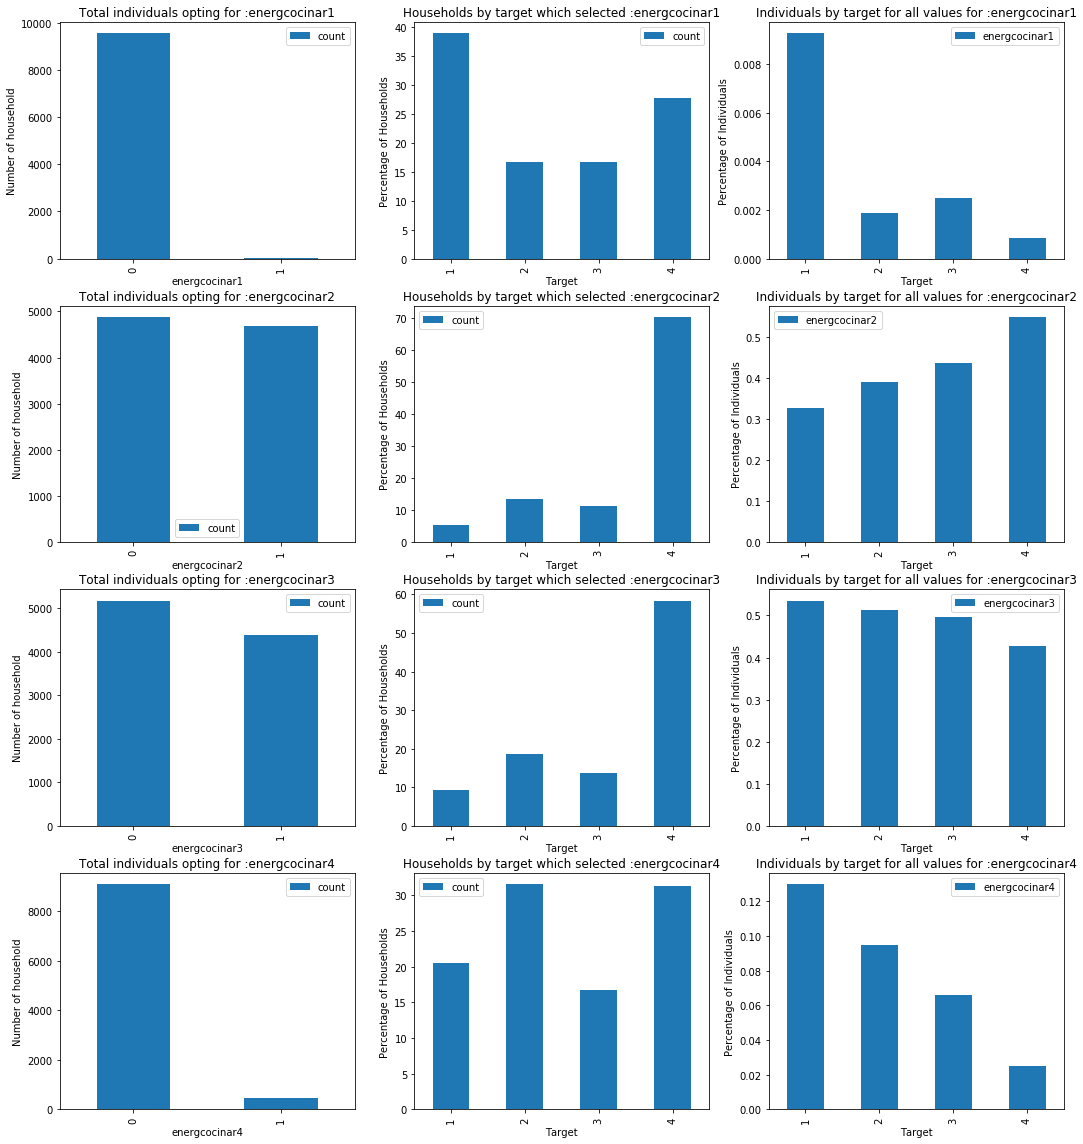

In [26]:
cookingSources = ['energcocinar1','energcocinar2','energcocinar3','energcocinar4']
noOfColumns = len(cookingSources)
fig = plt.figure(figsize=(18,noOfColumns*5))
i = 1
for col in cookingSources:
    temp1 = df_train.groupby(col).agg({'Id':'count'}).reset_index()
    temp1.drop(columns=[col],inplace=True)
    temp1.columns = ['count']
    ax1 = fig.add_subplot(noOfColumns,3,i)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Number of household')
    ax1.set_title('Total individuals opting for :' + str(col))
    temp1.plot(kind='bar',ax=ax1)
    
    temp2 = df_train.groupby('Target').agg({col:'sum'}).reset_index()
    temp2[col] = (temp2[col]/temp2[col].sum())*100
    temp2.set_index('Target',inplace=True)
    temp2.columns = ['count']
    ax2 = fig.add_subplot(noOfColumns,3,i+1)
    ax2.set_xlabel('Poverty Condition')
    ax2.set_ylabel('Percentage of Households')
    ax2.set_title('Households by target which selected :' + str(col))
    temp2.plot(kind='bar',ax=ax2)
    
    temp3 = df_train.groupby('Target').agg({col:'mean'}).reset_index()
    temp3.set_index('Target',inplace=True)
    ax3 = fig.add_subplot(noOfColumns,3,i+2)
    ax3.set_xlabel('Poverty Condition')
    ax3.set_ylabel('Percentage of Individuals')
    ax3.set_title('Individuals by target for all values for :' + str(col))
    temp3.plot(kind='bar',ax=ax3)
    del(temp1)
    del(temp2)
    del(temp3)
    i = i+3

#### <font color='#135589'>Rubbish Disposal</font>

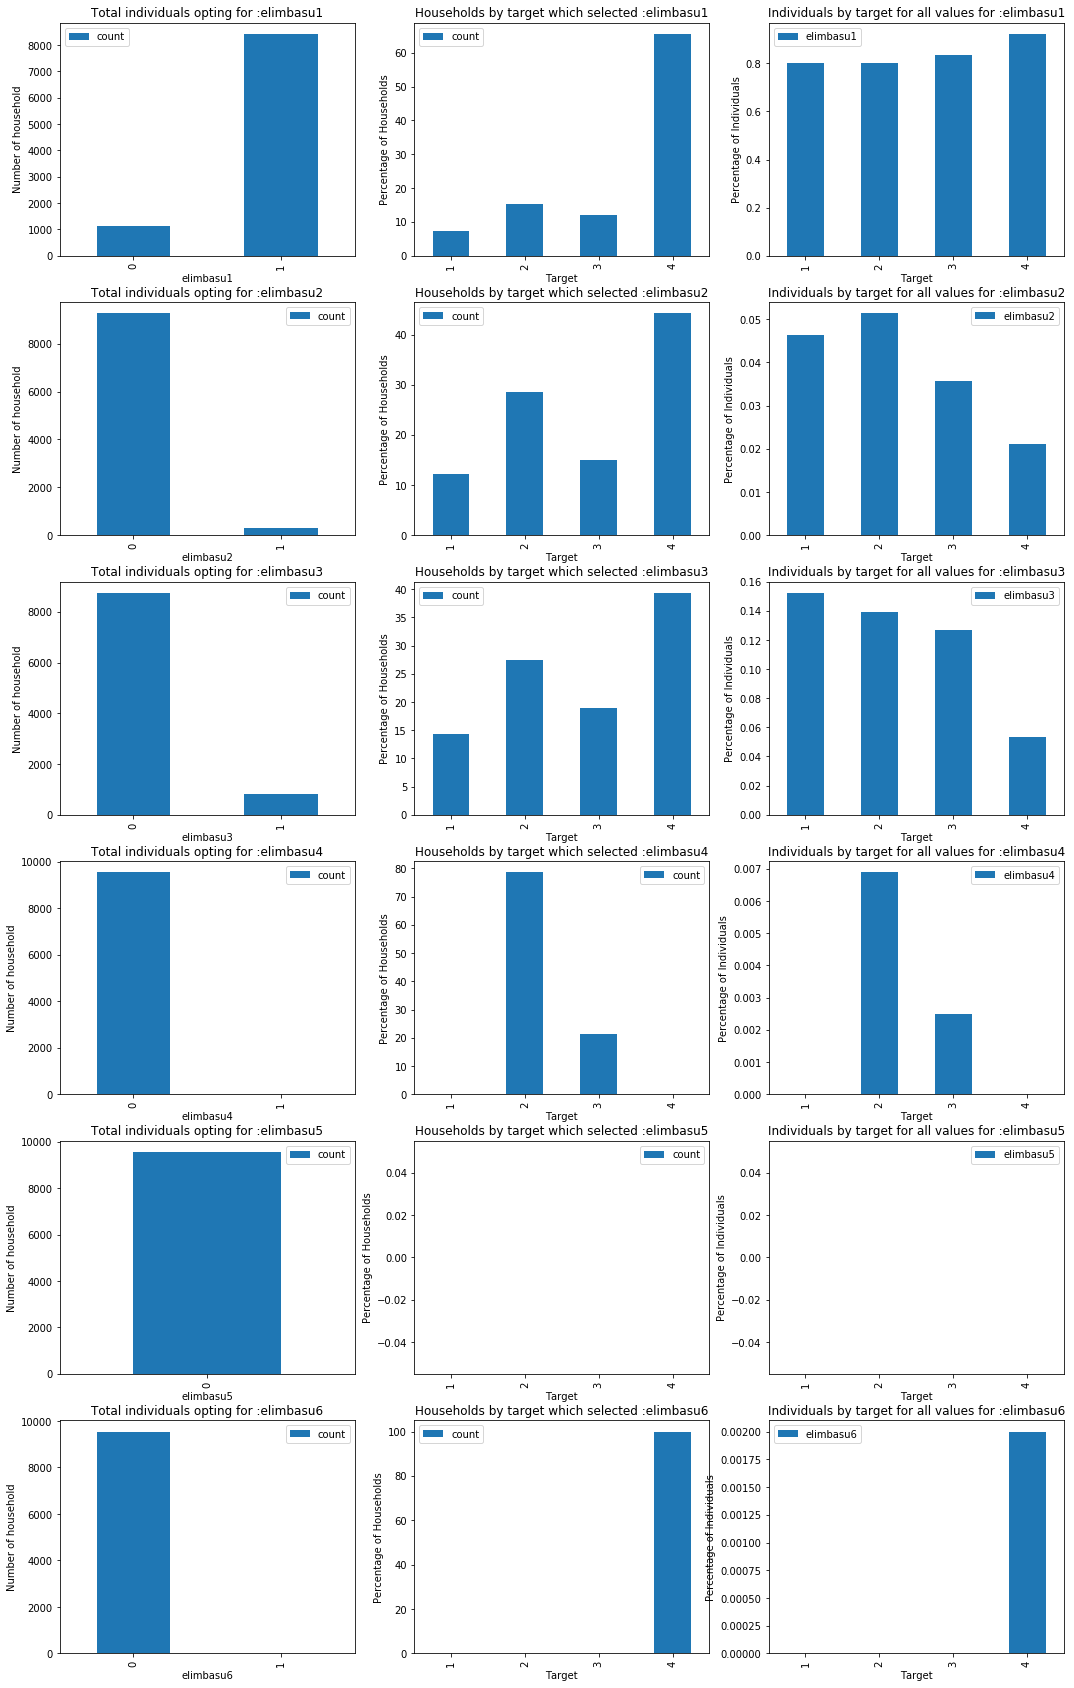

In [23]:
rubbishDisposal = ['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6']
noOfColumns = len(rubbishDisposal)
fig = plt.figure(figsize=(18,noOfColumns*5))
i = 1
for col in rubbishDisposal:
    temp1 = df_train.groupby(col).agg({'Id':'count'}).reset_index()
    temp1.drop(columns=[col],inplace=True)
    temp1.columns = ['count']
    ax1 = fig.add_subplot(noOfColumns,3,i)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Number of household')
    ax1.set_title('Total individuals opting for :' + str(col))
    temp1.plot(kind='bar',ax=ax1)
    
    temp2 = df_train.groupby('Target').agg({col:'sum'}).reset_index()
    temp2[col] = (temp2[col]/temp2[col].sum())*100
    temp2.set_index('Target',inplace=True)
    temp2.columns = ['count']
    ax2 = fig.add_subplot(noOfColumns,3,i+1)
    ax2.set_xlabel('Poverty Condition')
    ax2.set_ylabel('Percentage of Households')
    ax2.set_title('Households by target which selected :' + str(col))
    temp2.plot(kind='bar',ax=ax2)
    
    temp3 = df_train.groupby('Target').agg({col:'mean'}).reset_index()
    temp3.set_index('Target',inplace=True)
    ax3 = fig.add_subplot(noOfColumns,3,i+2)
    ax3.set_xlabel('Poverty Condition')
    ax3.set_ylabel('Percentage of Individuals')
    ax3.set_title('Individuals by target for all values for :' + str(col))
    temp3.plot(kind='bar',ax=ax3)
    del(temp1)
    del(temp2)
    del(temp3)
    i = i+3

In [71]:
temp = df_train.groupby(['idhogar','Target']).agg({'Id':'count'}).reset_index()
temp1 = temp.groupby('idhogar').agg({'Target':'count'}).reset_index()
familiesWithDifferenttarget = temp1[temp1['Target']>1][['idhogar','Target']]
print(len(temp1))
print(len(familiesWithDifferenttarget))

2988
85


In [72]:
temp

,idhogar,Target,Id
0,001ff74ca,4,2
1,003123ec2,2,4
2,004616164,2,2
3,004983866,3,2
4,005905417,2,3
5,006031de3,4,4
6,006555fe2,4,5
7,00693f597,4,4
8,006b64543,4,2
9,00941f1f4,1,4


In [61]:
familiesWithDifferenttarget

,idhogar,Target
17,0172ab1d9,2
42,03f4e5f4d,2
54,0511912b6,2
92,078a0b6e2,2
122,09e25d616,2
183,0f3e65c83,2
189,0f9494d3a,2
270,15a891635,2
300,17fb04a62,2
305,18832b840,2


In [ ]:
data[data['idhogar'].isin(familiesWithDifferenttarget['idhogar'])][['Id','age','Target']].groupby('Target').agg({'Id':'count'})

In [10]:
data['peopleinhousehold'] = data['bedrooms'] * data['overcrowding']
data['peopleinhousehold'] = data['peopleinhousehold'].astype(np.int8)
print('Difference between total individuals in household and bedrooms * no. of people per household :',len(data[data['hogar_total']!=data['peopleinhousehold']][['hogar_total','peopleinhousehold']]))
print('Difference between total individuals in household is greater than number of people in house :',len(data[data['hogar_total']>data['peopleinhousehold']][['hogar_total','peopleinhousehold']]))
print('Difference between total individuals in household is less than number of people in house :',len(data[data['hogar_total']<data['peopleinhousehold']][['hogar_total','peopleinhousehold']]))
data.drop(['peopleinhousehold'],inplace=True)

print('This shows a possibility that more than one family lives in same house and members of same family lives in different houses.')

Difference between total individuals in household and bedrooms * no. of people per household : 4163
Difference between total individuals in household is greater than number of people in house : 3058
Difference between total individuals in household is less than number of people in house : 1105
This shows a possibility that more than one family lives in same house and members of same family lives in different houses.


In [7]:
#Since hhsize and tamhog are same
data.drop(columns = ['tamhog'],inplace=True)

In [8]:
#Since overcrowding capture both so don't think 'hacdor','hacapo' is required
data.drop(columns =['hacdor','hacapo'],inplace=True)

In [9]:
#As computed above the number of tables in household with null values in zero
data['v18q1'].fillna(0,inplace=True)

In [10]:
#As computed above individual having more than 4 tables in household belong to Target 4
data['morethan4tablets'] = data['v18q1'].apply(lambda x: 1 if x>4 else 0)

In [11]:
#qfilter = (data['refrig']==1) | (data['v18q']==1) | (data['mobilephone']==1) | (data['computer']==1)
data['NumberOfLuxuryItems'] = 0
data['NumberOfLuxuryItems'] = np.where((data['refrig']==1),data['NumberOfLuxuryItems']+1,data['NumberOfLuxuryItems'])
data['NumberOfLuxuryItems'] = np.where((data['v18q']==1),data['NumberOfLuxuryItems']+1,data['NumberOfLuxuryItems'])
data['NumberOfLuxuryItems'] = np.where((data['mobilephone']==1),data['NumberOfLuxuryItems']+1,data['NumberOfLuxuryItems'])
data['NumberOfLuxuryItems'] = np.where((data['computer']==1),data['NumberOfLuxuryItems']+1,data['NumberOfLuxuryItems'])
data['NumberOfLuxuryItems'].value_counts()

2    22102
3     7407
4     2063
1     1705
0      136
Name: NumberOfLuxuryItems, dtype: int64

In [12]:
data['householdmaterials'] = 0
data['householdmaterials'] = np.where((data['techozinc']==1) & (data['pisomoscer']==1) & (data['paredblolad']==1),data['householdmaterials']+1,data['householdmaterials'])

# <font color="#2086BA">4. Feature Engineering</font> 

# <font color="#2086BA">5. Predictive Modelling</font> 

In [65]:
prediction_var = [x for x in df_train.columns if x not in ['Id','dependency','edjefa','edjefe','idhogar','parentesco1','Target']]
target_var = 'Target'

In [71]:
train = data[(data[target_var].notnull())]
test = data[(data[target_var].isnull())]
test.drop(['Target'],axis=1,inplace=True)

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn import metrics
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

        #Fit the model again so that it can be refered outside the function:
        model.fit(data[predictors],data[outcome]) 

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classification_model(model,train,prediction_var,target_var)

Accuracy : 65.732%
Cross-Validation Score : 76.778%
Cross-Validation Score : 74.242%
Cross-Validation Score : 71.315%
Cross-Validation Score : 67.641%
Cross-Validation Score : 65.312%


In [74]:
len(test)

23856

In [79]:
test["Target"] = model.predict(test[prediction_var])
test[["Id","Target"]].to_csv(os.path.join(folderPath,"CostaRiconPovertyPrediction_LR_12092018.csv"),index=False)

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# <font color="#2086BA">6. Evaluation</font> 

In [82]:
test[["Id","Target"]].dtypes

Id         object
Target    float64
dtype: object